In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import datetime as dt

In [2]:
df_emy = pd.read_csv('dataset.csv')
df_emy.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [ ]:
df_emy.tail()

In [41]:
df_emy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9700 entries, 0 to 9699
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_Pedido     9700 non-null   object 
 1   Data_Pedido   9700 non-null   object 
 2   ID_Cliente    9700 non-null   object 
 3   Segmento      9700 non-null   object 
 4   Pais          9700 non-null   object 
 5   Cidade        9700 non-null   object 
 6   Estado        9700 non-null   object 
 7   ID_Produto    9700 non-null   object 
 8   Categoria     9700 non-null   object 
 9   SubCategoria  9700 non-null   object 
 10  Valor_Venda   9700 non-null   float64
dtypes: float64(1), object(10)
memory usage: 833.7+ KB


In [ ]:
df_emy.isnull().sum()

In [7]:
df_emy.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [12]:
df_emy['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

1. Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [37]:
#Filtrei o "Office Supplies" na categoria de 'Produtos'
df_office = df_emy[df_emy['Categoria'] == 'Office Supplies']
#Agrupei por Cidade calculando a soma do Valor de Venda
df_group1 = df_office.groupby('Cidade')['Valor_Venda'].sum()

display(df_group1)

#Buscar a Cidade com o maior Valor de Venda no df_group1
df_group1.idxmax()
#OU
cidade1 = df_group1[df_group1 == df_group1.max()].index[0]
print("A cidade com maior Valor de Venda de Produtos na Categoria 'Office Supplies'é: {}" .format(cidade1))


Cidade
Aberdeen         25.500
Abilene           1.392
Akron          1107.646
Albuquerque     943.122
Alexandria     4879.790
                 ...   
Woonsocket      142.590
Yonkers         665.964
York            395.920
Yucaipa          50.800
Yuma             55.352
Name: Valor_Venda, Length: 480, dtype: float64

A cidade com maior Valor de Venda de Produtos na Categoria 'Office Supplies'é: New York City


2. Qual o Total de Vendas Por Data do Pedido?
Demonstre o resultado através de um gráfico de barras.

In [43]:
#Converter para Data pq estava como Objeto
df_emy['Data_Pedido'] = pd.to_datetime(df_emy['Data_Pedido'])

c:\Users\Emily\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/04/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Emily\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/11/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Emily\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/05/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Emily\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/08/2015' in DD/MM/YYYY format. Provide format or specif

In [45]:
#Agrupar por Data de Pedido o Total de Vendas
df_group2_date = df_emy.groupby('Data_Pedido')['Valor_Venda'].sum()
display(df_group2_date)


Data_Pedido
2015-01-02     468.9000
2015-01-03    2203.1510
2015-01-04     119.8880
2015-01-06    5188.5200
2015-01-07     601.0240
                ...    
2018-12-26     814.5940
2018-12-27     177.6360
2018-12-28    1657.3508
2018-12-29    2915.5340
2018-12-30     713.7900
Name: Valor_Venda, Length: 1226, dtype: float64

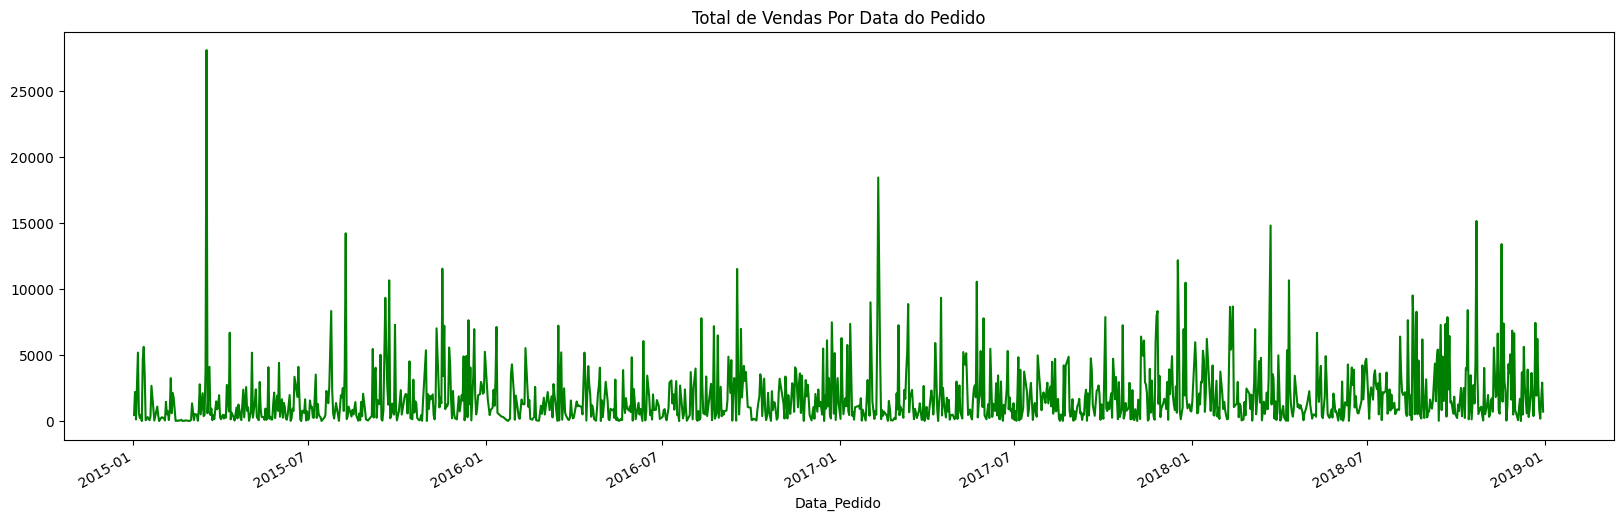

In [51]:
plt.figure(figsize = (20, 6))
df_group2_date.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'green')
plt.title('Total de Vendas Por Data do Pedido')
plt.show()

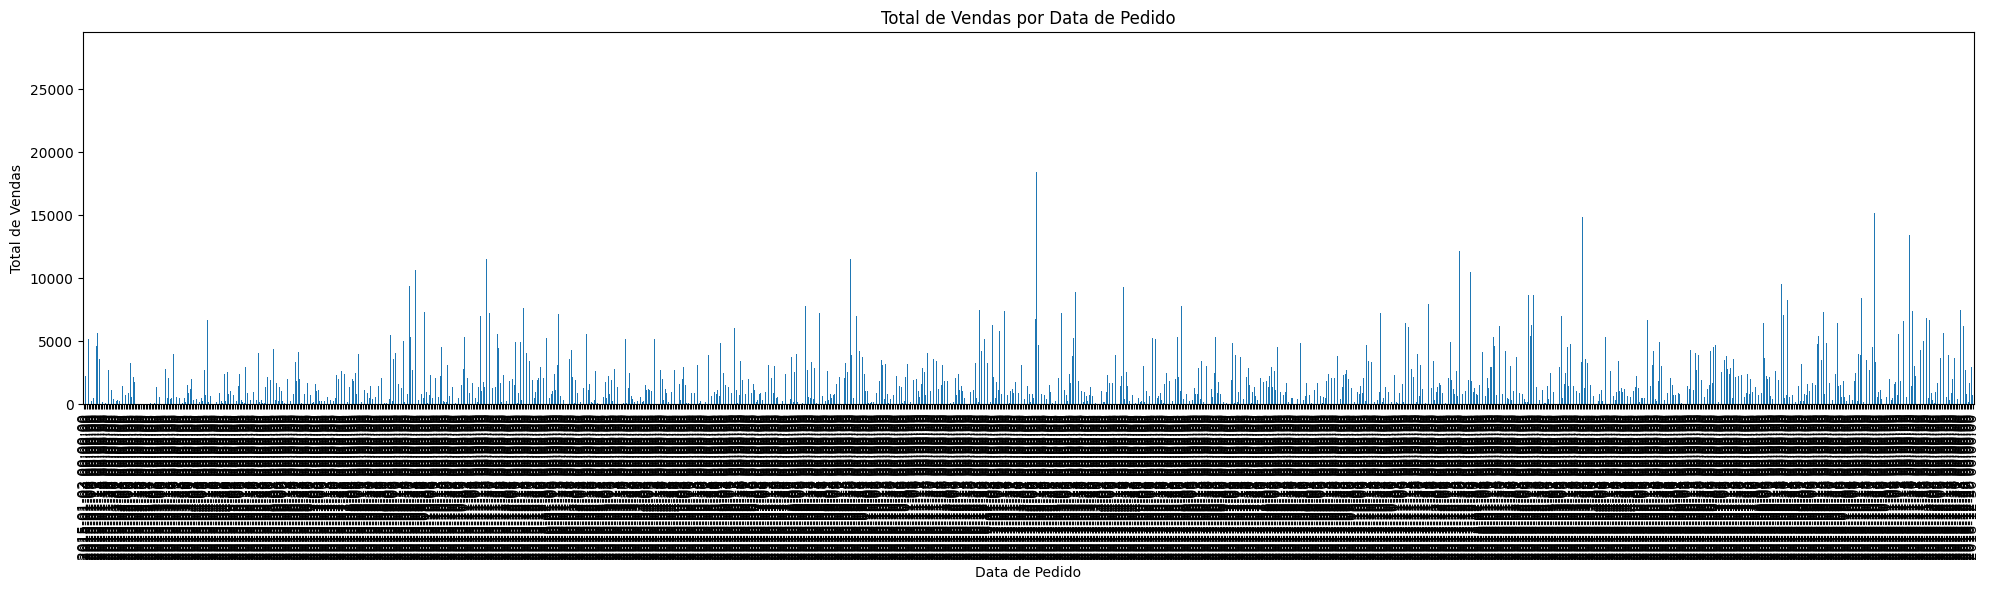

In [52]:
plt.figure(figsize=(20, 6))  # Tamanho da figura
df_group2_date.plot(kind='bar')  # Tipo de gráfico

plt.title('Total de Vendas por Data de Pedido')  # Título do gráfico
plt.xlabel('Data de Pedido')  # Rótulo do eixo x
plt.ylabel('Total de Vendas')  # Rótulo do eixo y

plt.tight_layout()  # Melhora o espaçamento

plt.show()  # Mostra o gráfico

3. Qual o Total de Vendas por Estado?
Demonstre o resultado através de um gráfico de barras.

In [103]:
#Agrupar por Estado o Total de Vendas
df_group3_estado = df_emy.groupby('Estado')['Valor_Venda'].sum().reset_index()
display(df_group3_estado)


,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980
5,Connecticut,13366.7370
6,Delaware,26452.5890
7,District of Columbia,2865.0200
8,Florida,88043.7000
9,Georgia,48083.1600


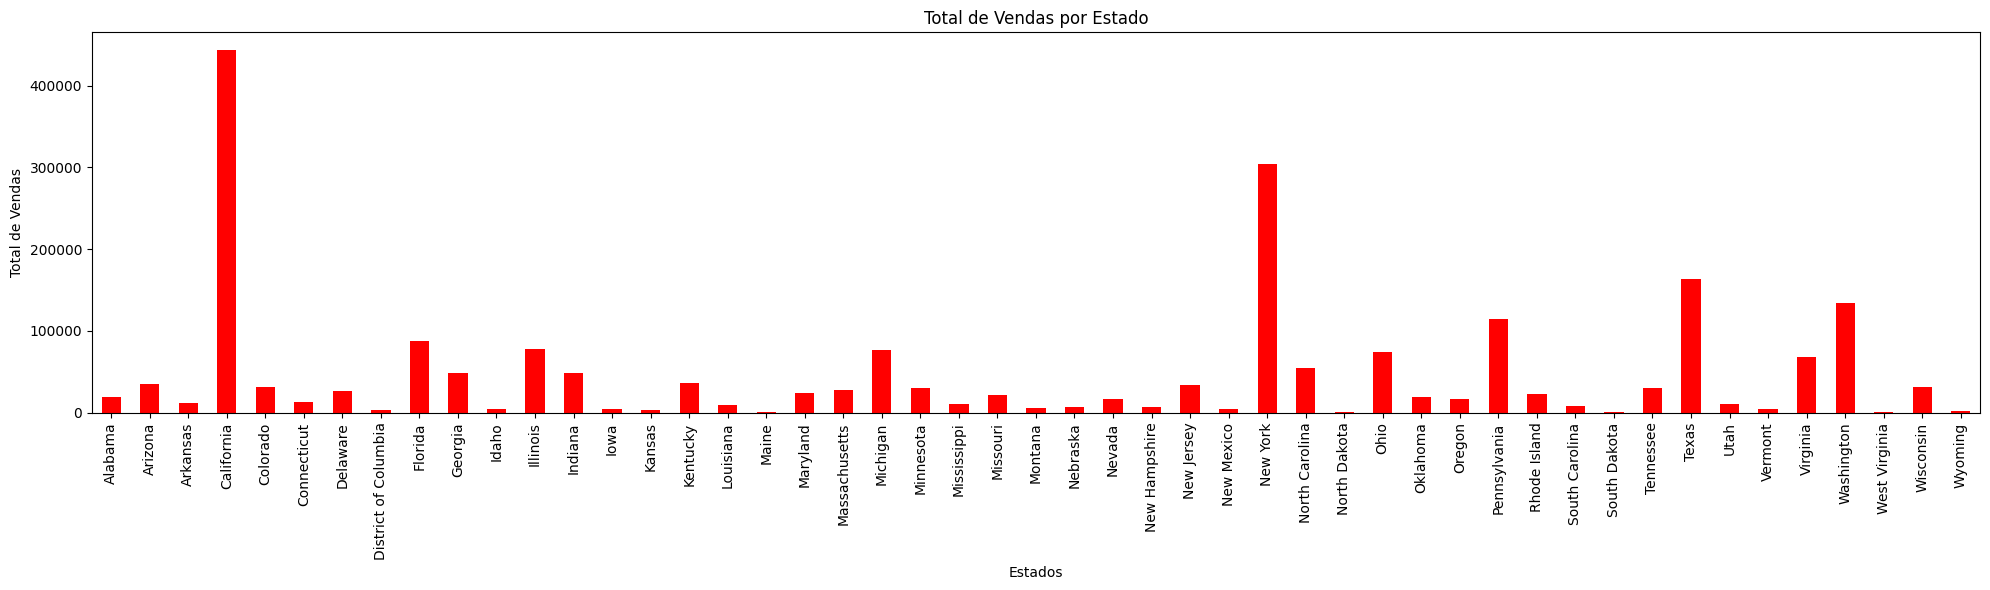

In [60]:
plt.figure(figsize=(20, 6))  # Tamanho da figura
df_group3_estado.plot(kind='bar', color='r')  # Tipo de gráfico

plt.title('Total de Vendas por Estado')  # Título do gráfico
plt.xlabel('Estados')  # Rótulo do eixo x
plt.ylabel('Total de Vendas')  # Rótulo do eixo y

plt.tight_layout()  # Melhora o espaçamento

plt.show()  # Mostra o gráfico

In [ ]:
plt.figure(figsize = (16, 6))
sea.barplot(data = df_group3_estado, 
            y = 'Valor_Venda', 
            x = 'Estado').set(title = 'Vendas Por Estado')
plt.xticks(rotation = 80)
plt.show()

4. Quais São as 10 Cidades com Maior Total de Vendas?
Demonstre o resultado através de um gráfico de barras.

In [102]:
#Filtrar o total de vendas por Cidade
df_group4_cidade = df_emy.groupby('Cidade')['Valor_Venda'].sum().reset_index()
df_group4_cidade.info()

#Ordenar as com 10 maiores valores
df_group4_cidade = df_group4_cidade.sort_values(by = 'Valor_Venda', ascending=False)
top_cidades = df_group4_cidade.head(10)
display(top_cidades)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cidade       528 non-null    object 
 1   Valor_Venda  528 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.4+ KB


,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


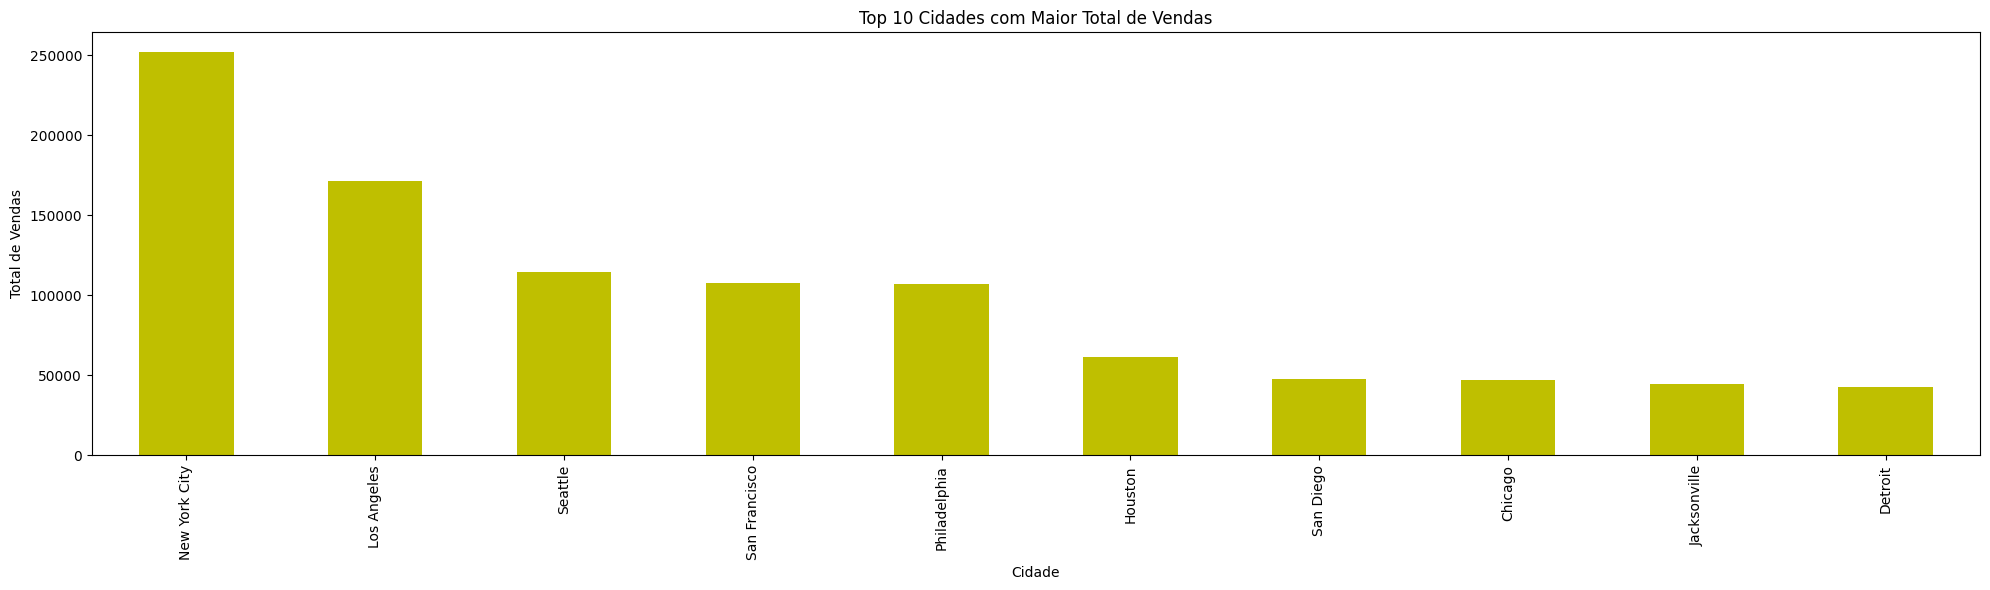

In [71]:
plt.figure(figsize=(20, 6))  # Tamanho da figura
top_cidades.plot(kind='bar', color='y')  # Tipo de gráfico

plt.title('Top 10 Cidades com Maior Total de Vendas')  # Título do gráfico
plt.xlabel('Cidade')  # Rótulo do eixo x
plt.ylabel('Total de Vendas')  # Rótulo do eixo y

plt.tight_layout()  # Melhora o espaçamento

plt.show()

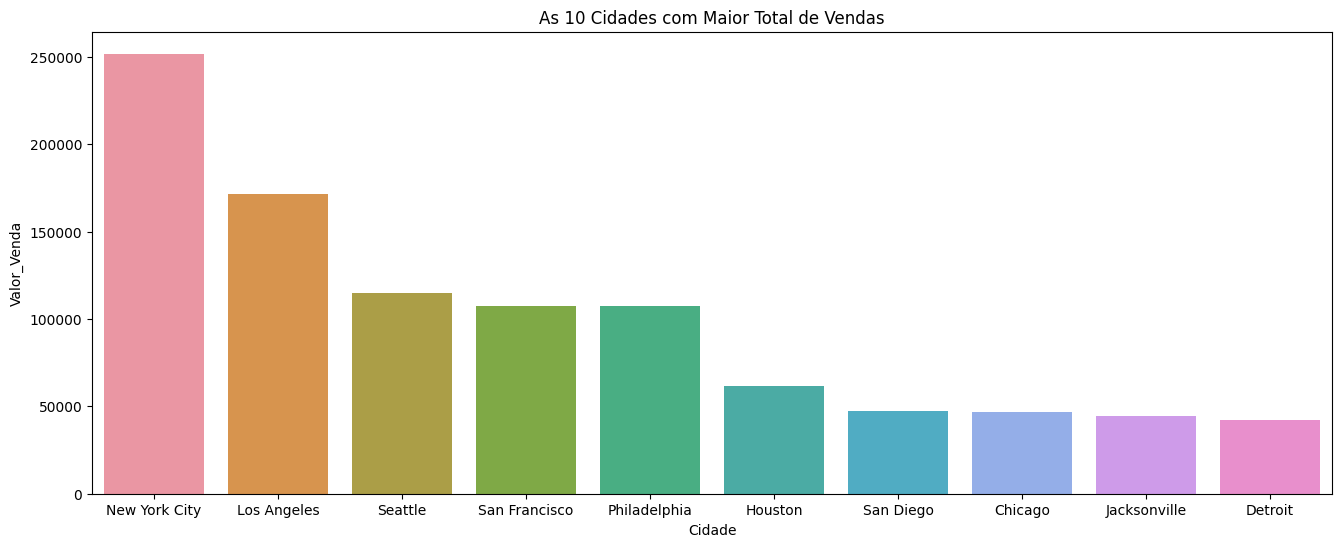

In [105]:
plt.figure(figsize = (16, 6))
sea.set_palette('coolwarm')
sea.barplot(data = top_cidades, 
            y = 'Valor_Venda', 
            x = 'Cidade').set(title = 'As 10 Cidades com Maior Total de Vendas')
plt.show()

5. Qual Segmento Teve o Maior Total de Vendas?
Demonstre o resultado através de um gráfico de pizza.

In [119]:
#Filtrar o total de vendas por Segmento
df_group5_seg = df_emy.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False)
display(df_group5_seg)

segmentos = df_group5_seg['Segmento'].tolist()
print(segmentos)


,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


['Consumer', 'Corporate', 'Home Office']


In [111]:
#Função para converter os dados em valores absolutos
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

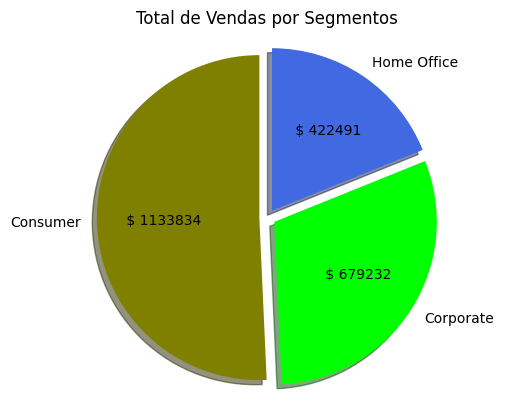

In [125]:
cores = ['olive', 'lime', 'royalblue']
plt.pie(df_group5_seg['Valor_Venda'], labels = segmentos, colors = cores, startangle = 90, shadow = True, explode = (0.05,0.05,0.05), autopct = autopct_format(df_group5_seg['Valor_Venda']))
plt.title('Total de Vendas por Segmentos')
plt.axis('equal')
plt.show()

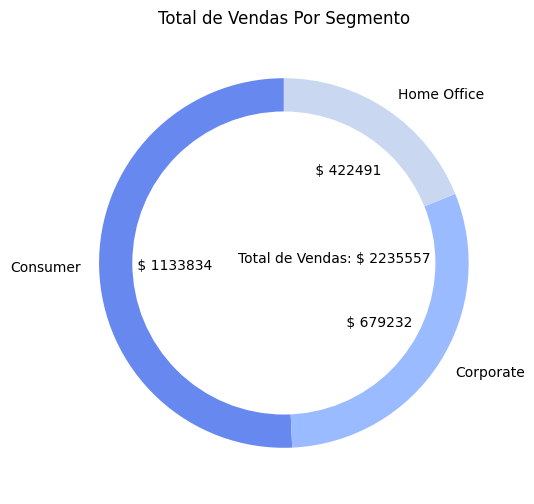

In [123]:
# Plot

# Tamanho da figura
plt.figure(figsize = (16, 6))

# Gráfico de pizza
plt.pie(df_group5_seg['Valor_Venda'], 
        labels = df_group5_seg['Segmento'],
        autopct = autopct_format(df_group5_seg['Valor_Venda']),
        startangle = 90)

# Limpa o círculo central
centre_circle = plt.Circle((0, 0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Labels e anotações
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_group5_seg['Valor_Venda']))), xy = (-0.25, 0))
plt.title('Total de Vendas Por Segmento')
plt.show()

6. Qual o Total de Vendas Por Segmento e Por Ano?

In [129]:
#Filtrar o total de vendas por Segmento
df_group6_seg = df_emy.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False)
display(df_group6_seg)

df_group6_ano = df_emy.groupby(df_emy['Data_Pedido'].dt.year)['Valor_Venda'].sum().reset_index()
display(df_group6_ano)

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


,Data_Pedido,Valor_Venda
0,2015,470768.6001
1,2016,454072.5154
2,2017,595365.9240
3,2018,715350.9152


In [131]:
df_emy.head()
df_emy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9700 entries, 0 to 9699
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID_Pedido     9700 non-null   object        
 1   Data_Pedido   9700 non-null   datetime64[ns]
 2   ID_Cliente    9700 non-null   object        
 3   Segmento      9700 non-null   object        
 4   Pais          9700 non-null   object        
 5   Cidade        9700 non-null   object        
 6   Estado        9700 non-null   object        
 7   ID_Produto    9700 non-null   object        
 8   Categoria     9700 non-null   object        
 9   SubCategoria  9700 non-null   object        
 10  Valor_Venda   9700 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 833.7+ KB


In [139]:
#Criei uma coluna para o Ano
df_emy['Ano'] = df_emy['Data_Pedido'].dt.year
df_emy.head()
df_emy.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830,2018
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320,2018
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776,2018
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620,2017
9699,CA-2018-147032,2018-07-31,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540,2018


In [136]:
df_group6_seg_ano = df_emy.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum()
display(df_group6_seg_ano)

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64

7. Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

Se o Valor_Venda for maior que 1000 recebe 15% de desconto.

Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

Quantas Vendas Receberiam 15% de Desconto?

In [137]:
#Filtrar os valores de venda
df_group7 =  df_emy[df_emy['Valor_Venda'] > 1000].reset_index()
display(df_group7)

,index,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,10,CA-2015-115812,2015-09-06,BH-11710,Consumer,United States,Los Angeles,California,FUR-TA-10001539,Furniture,Tables,1706.184,2015
1,24,CA-2016-106320,2016-09-25,EB-13870,Consumer,United States,Orem,Utah,FUR-TA-10000577,Furniture,Tables,1044.630,2016
2,27,US-2016-150630,2016-09-17,TB-21520,Consumer,United States,Philadelphia,Pennsylvania,FUR-BO-10004834,Furniture,Bookcases,3083.430,2016
3,35,CA-2017-117590,2017-08-12,GH-14485,Corporate,United States,Richardson,Texas,TEC-PH-10004977,Technology,Phones,1097.544,2017
4,54,CA-2017-105816,2017-11-12,JM-15265,Corporate,United States,New York City,New York,TEC-PH-10002447,Technology,Phones,1029.950,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,9632,CA-2015-151330,2015-10-14,TC-21295,Consumer,United States,Everett,Massachusetts,FUR-CH-10000749,Furniture,Chairs,1628.820,2015
453,9636,CA-2016-116638,2016-01-28,JH-15985,Consumer,United States,Concord,North Carolina,FUR-TA-10000198,Furniture,Tables,4297.644,2016
454,9646,CA-2017-107104,2017-11-26,MS-17365,Consumer,United States,Los Angeles,California,FUR-BO-10002213,Furniture,Bookcases,3406.664,2017
455,9657,CA-2017-160717,2017-06-06,ME-17320,Home Office,United States,Santa Barbara,California,TEC-PH-10001459,Technology,Phones,3023.928,2017


In [138]:
df_group7a =  df_emy[df_emy['Valor_Venda'] < 1000].reset_index()
display(df_group7a)

,index,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,0,CA-2017-152156,2017-08-11,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,1,CA-2017-152156,2017-08-11,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,2,CA-2017-138688,2017-12-06,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,3,US-2016-108966,2016-11-10,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,4,US-2016-108966,2016-11-10,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9238,9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,2018
9239,9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,2018
9240,9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,2018
9241,9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200,2017


In [140]:
df_emy['Desconto'] = np.where(df_emy['Valor_Venda'] > 1000, 0.15, 0.10)
df_emy['Desconto'].value_counts()

0.10    9243
0.15     457
Name: Desconto, dtype: int64

In [141]:
print('No total 457 vendas teriam 15% de desconto')

No total 457 vendas teriam 15% de desconto


8. Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [156]:
df_emy['Novos Valores'] = np.where(df_emy['Valor_Venda'] > 1000, (0.85*df_emy['Valor_Venda']), (0.90*df_emy['Valor_Venda']))
df_emy.head(15)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Novos Valores
0,CA-2017-152156,2017-08-11,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.10,235.76400
1,CA-2017-152156,2017-08-11,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.10,658.74600
2,CA-2017-138688,2017-12-06,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.10,13.15800
3,US-2016-108966,2016-11-10,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.10,861.81975
4,US-2016-108966,2016-11-10,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.10,20.13120
5,CA-2015-115812,2015-09-06,BH-11710,Consumer,United States,Los Angeles,California,FUR-FU-10001487,Furniture,Furnishings,48.8600,2015,0.10,43.97400
6,CA-2015-115812,2015-09-06,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.2800,2015,0.10,6.55200
7,CA-2015-115812,2015-09-06,BH-11710,Consumer,United States,Los Angeles,California,TEC-PH-10002275,Technology,Phones,907.1520,2015,0.10,816.43680
8,CA-2015-115812,2015-09-06,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.5040,2015,0.10,16.65360
9,CA-2015-115812,2015-09-06,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.9000,2015,0.10,103.41000


In [158]:
df_antesdesc =  df_emy.loc[df_emy['Desconto'] == 0.15, 'Valor_Venda']
media_antes = df_antesdesc.mean()
print('A media do valor de vendas antes do desconto seria: R${:.2f}' .format(media_antes))

A media do valor de vendas antes do desconto seria: R$2116.81


In [159]:
df_depoisdesc =  df_emy.loc[df_emy['Desconto'] == 0.15, 'Novos Valores']
media_depois =  df_depoisdesc.mean()
print('A media do valor de vendas depois do desconto seria: R${:.2f}' .format(media_depois))

A media do valor de vendas depois do desconto seria: R$1799.29


9. Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?
Demonstre o resultado através de gráfico de linha.

In [161]:
#Criei uma coluna para o Mês
df_emy['Mes'] = df_emy['Data_Pedido'].dt.month
df_emy.head()
df_emy.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Novos Valores,Mes
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830,2018,0.1,20.5470,12
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320,2018,0.1,48.8880,12
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776,2018,0.1,177.0984,12
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620,2017,0.1,3.2580,10
9699,CA-2018-147032,2018-07-31,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540,2018,0.1,10.3860,7


In [165]:
df_group9 = df_emy.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])
display(df_group9)

sum        mean  median
Ano  Mes Segmento                                   
2015 1   Consumer     18469.0240  246.253653  56.064
         Corporate     4600.5920  153.353067  62.440
         Home Office   5758.6380  274.220857  45.480
     2   Consumer      7871.1020  174.913378  34.860
         Corporate     2253.0700   93.877917  40.950
...                          ...         ...     ...
2018 11  Corporate    23986.0962  247.279342  71.952
         Home Office  19043.2760  268.215155  56.560
     12  Consumer     31732.4178  182.370217  46.802
         Corporate    13941.2860  158.423705  44.855
         Home Office  11064.5080  190.767379  42.650

[144 rows x 3 columns]

In [167]:
#Extrair os níveis
anos = df_group9.index.get_level_values(0)
meses = df_group9.index.get_level_values(1)
segmentos = df_group9.index.get_level_values(2)

<Figure size 1200x600 with 0 Axes>

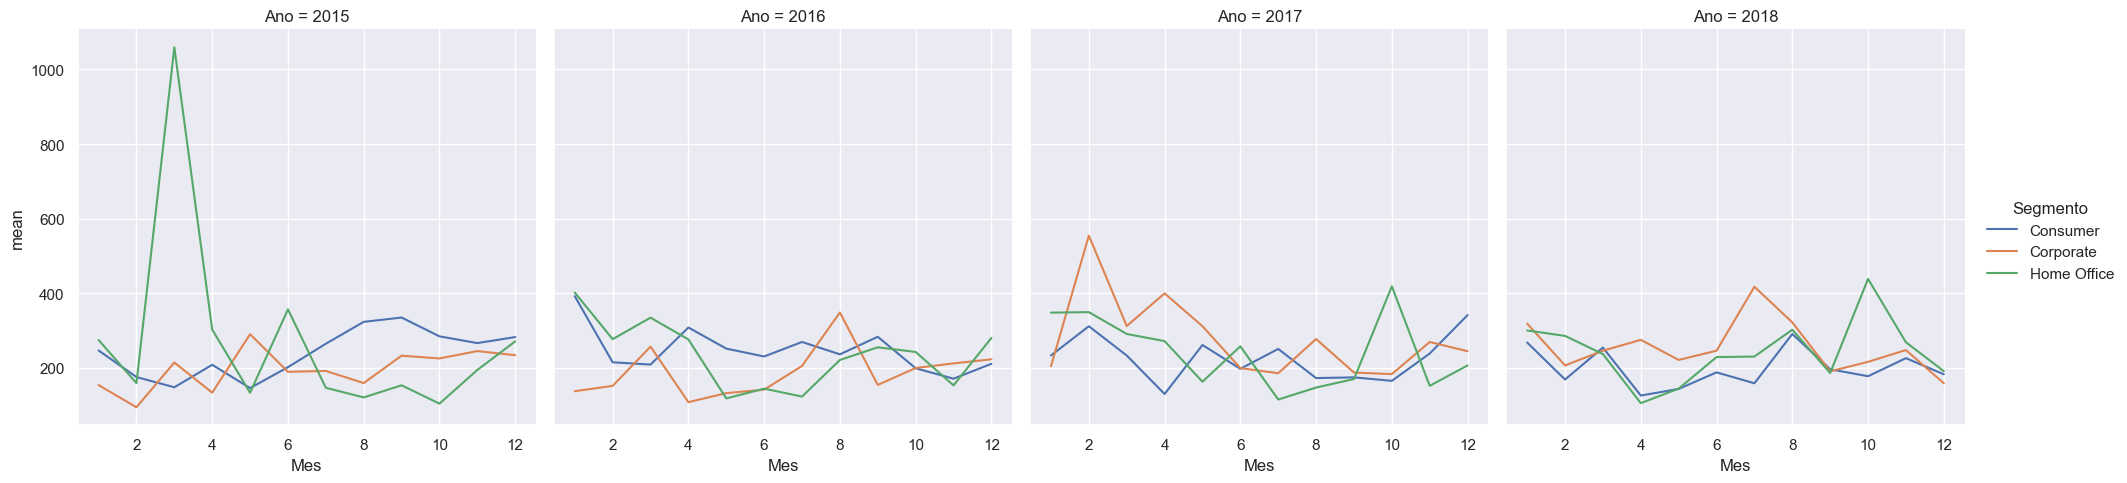

In [170]:
plt.figure(figsize = (12, 6))
sea.set()
fig1 = sea.relplot(kind = 'line',
                   data = df_group9, 
                   y = 'mean', 
                   x = meses,
                   hue = segmentos, 
                   col = anos,
                   col_wrap = 4)
plt.show()

10. Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?
Demonstre tudo através de um único gráfico.

In [175]:
df_group10 = df_emy.groupby(['Categoria','SubCategoria']).sum(numeric_only = True).sort_values('Valor_Venda', ascending = False).head(12)

In [176]:
# Convertemos a coluna Valor_Venda em número inteiro e classificamos por categoria
df_group10 = df_group10[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()
display(df_group10)

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [177]:
# Criamos outro dataframe somente com os totais por categoria
df_group10_cat = df_group10.groupby('Categoria').sum(numeric_only = True).reset_index()
display(df_group10_cat)

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [178]:
df_group10_cat2 = df_emy.groupby(['Categoria', 'SubCategoria'])['Valor_Venda'].sum().reset_index()
display(df_group10_cat2)

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Bookcases,108045.0467
1,Furniture,Chairs,317919.6250
2,Furniture,Furnishings,88862.7700
3,Furniture,Tables,202083.3600
4,Office Supplies,Appliances,104061.6930
5,Office Supplies,Art,26573.7360
6,Office Supplies,Binders,194723.3810
7,Office Supplies,Envelopes,15791.1820
8,Office Supplies,Fasteners,3001.9600
9,Office Supplies,Labels,12267.3660


In [179]:
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']                   

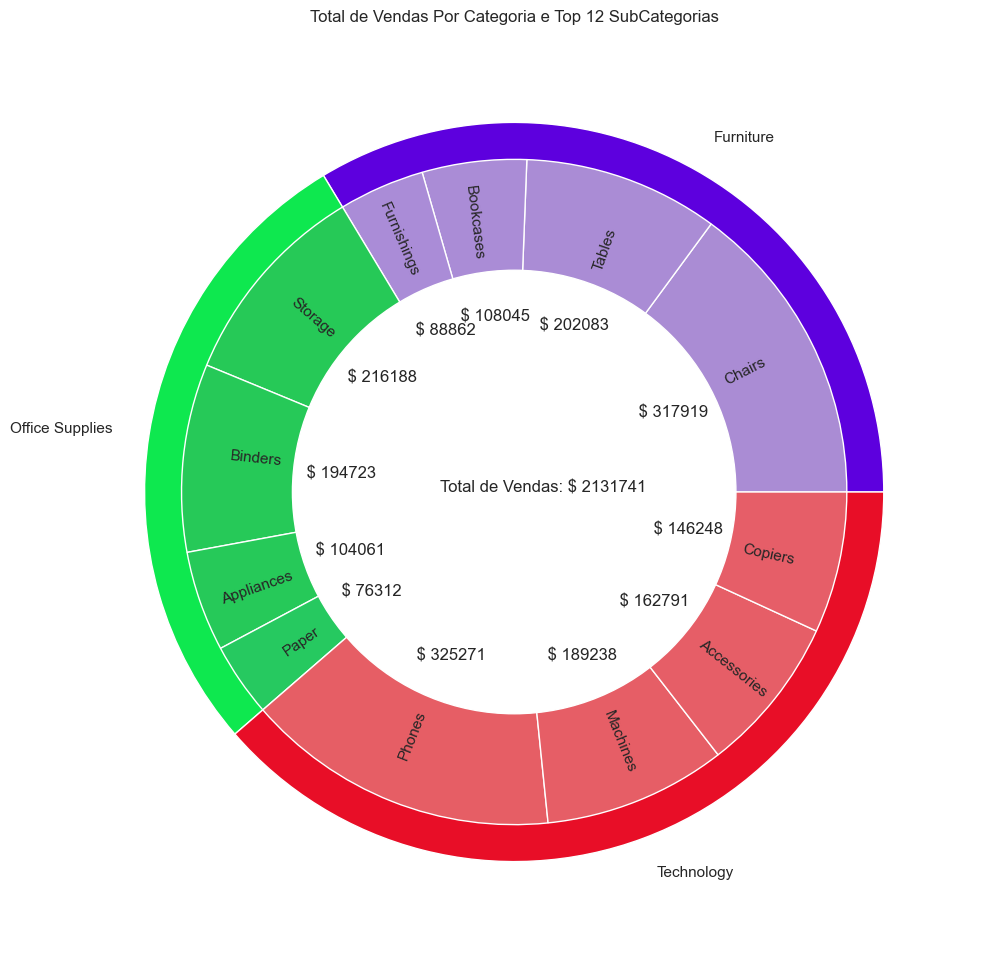

In [182]:
# Plot

# Tamanho da figura
fig, ax = plt.subplots(figsize = (18,12))

# Gráfico das categorias
p1 = ax.pie(df_group10_cat['Valor_Venda'], 
            radius = 1,
            labels = df_group10_cat['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

# Gráfico das subcategorias
p2 = ax.pie(df_group10['Valor_Venda'],
            radius = 0.9,
            labels = df_group10['SubCategoria'],
            autopct = autopct_format(df_group10['Valor_Venda']),
            colors = cores_subcategorias, 
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'), 
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_group10['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()